# Locality Comparison

**Imports**:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from os import listdir
from os.path import isfile, join
import dataframe_image as dfi

**Data Retrieval**

Insert local path to your Results folders for randomized and fixed locality here:

In [2]:
path_random = "C:\\Path\\to\\folder\\containing\\the\\results\\random\\" # TODO FILL IN THE LOCAL PATH
path_end = "C:\\Path\\to\\folder\\containing\\the\\results\\end\\" # TODO FILL IN THE LOCAL PATH

In [4]:
path_random = "C:\\Users\\Bo\\Documents\\TUDCODE\\Results\\results-mutation-weights-random\\"
robot_files_random =  [f for f in listdir(path_random + "robot\\")  if isfile(join(path_random + "robot\\", f))]
pixel_files_random =  [f for f in listdir(path_random + "pixel\\")  if isfile(join(path_random + "pixel\\", f))]
string_files_random = [f for f in listdir(path_random + "string\\") if isfile(join(path_random + "string\\", f))]

In [5]:
path_end = "C:\\Users\\Bo\\Documents\\TUDCODE\\Results\\results-mutation-weights-end\\"
robot_files_end =  [f for f in listdir(path_end + "robot\\")  if isfile(join(path_end + "robot\\", f))]
pixel_files_end =  [f for f in listdir(path_end + "pixel\\")  if isfile(join(path_end + "pixel\\", f))]
string_files_end = [f for f in listdir(path_end + "string\\") if isfile(join(path_end + "string\\", f))]

In [10]:
#Load data for randomized locality experiments
robot_data_random = []
for file in robot_files_random:
    with open(path_random + 'robot\\' + file, 'r') as f:
      l = json.loads(f.readlines()[-1])
      if ('domain' in l.keys() and l['domain'] == "robot"):
            robot_data_random.append(l)
    
pixel_data_random = []
for file in pixel_files_random:
    with open(path_random + 'pixel\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "pixel"):
            pixel_data_random.append(l)

string_data_random = []
for file in string_files_random:
    with open(path_random + 'string\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "string"):
            string_data_random.append(l)

In [11]:
# Load data for fixed locality experiments
robot_data_end = []
for file in robot_files_end:
    with open(path_end + 'robot\\' + file, 'r') as f:
      l = json.loads(f.readlines()[-1])
      if ('domain' in l.keys() and l['domain'] == "robot"):
            robot_data_end.append(l)
    
pixel_data_end = []
for file in pixel_files_end:
    with open(path_end + 'pixel\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "pixel"):
            pixel_data_end.append(l)

string_data_end = []
for file in string_files_end:
    with open(path_end + 'string\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "string"):
            string_data_end.append(l)

**Restructure Data**

In [12]:
for x in robot_data_random:
    x['locality'] = 'random'
    
for x in pixel_data_random:
    x['locality'] = 'random'
    
for x in string_data_random:
    x['locality'] = 'random'
    

for x in robot_data_end:
    x['locality'] = 'end'
    
for x in pixel_data_end:
    x['locality'] = 'end'
    
for x in string_data_end:
    x['locality'] = 'end'

In [13]:
robot_data_raw = [robot_data_random, robot_data_end]
pixel_data_raw = [pixel_data_random, pixel_data_end]
string_data_raw = [string_data_random, string_data_end]

labels = ["random", "end"]
domains = ["robot", "pixel", "string"]

In [14]:
def rename (data:dict):
    data['params']['add_token'] = data['params'].pop('add_token_random') + data['params'].pop('add_token_end')
    data['params']['remove_token'] = data['params'].pop('remove_token_random') + data['params'].pop('remove_token_end')
    data['params']['add_loop'] = data['params'].pop('add_loop_random') + data['params'].pop('add_loop_end')
    data['params']['add_if_statement'] = data['params'].pop('add_if_statement_random') + data['params'].pop('add_if_statement_end')
    return data

robot_data = [rename(y) for x in robot_data_raw for y in x]
pixel_data = [rename(y) for x in pixel_data_raw for y in x]
string_data = [rename(y) for x in string_data_raw for y in x]


**Important:**<br>
You can change the statistic show in each method.<br>
E.g. np.mean(temp), np.median(temp), or based on a selection np.mean(temp[:3]) (mean of the best 3 results)


In [15]:
def group_by_locality_cases_solved(data):
    res = []
    for l in labels:
        temp = [float(re.match(".*\((.*)%\).*$", j['cases_solved']).group(1)) for j in filter(lambda x: x['locality'] == l, d)]
        temp.sort(reverse=True)
        res.append(np.median(temp)) # Change here
    return res

def group_by_locality_execution_time(data):
    res = []
    for l in labels:
        temp = [j['average_correct']['execution_time'] for j in filter(lambda x: x['locality'] == l, d)]
        temp.sort(reverse=False)
        res.append(np.median(temp)) # Change here
    return res

def group_by_locality_program_length(data):
    res = []
    for l in labels:
        temp = [j['average_correct']['program_length'] for j in filter(lambda x: x['locality'] == l, d)]
        temp.sort(reverse=False)
        res.append(np.median(temp)) # Change here
    return res

## Plot Results

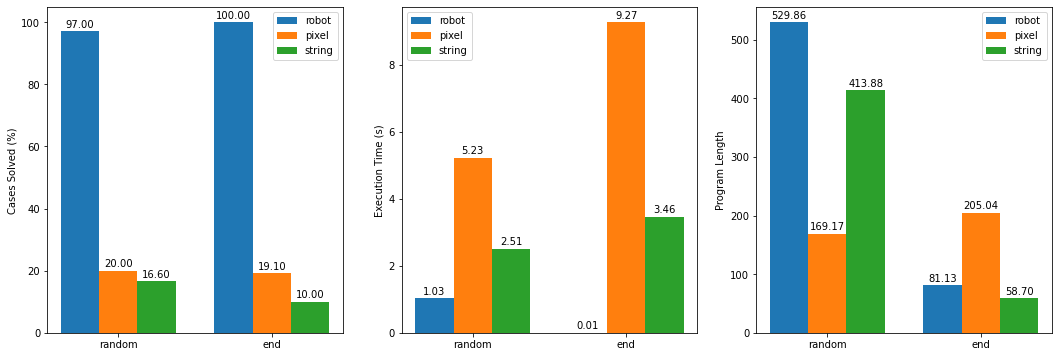

In [19]:
data = [robot_data, pixel_data, string_data]
fig, axs = plt.subplots(1, 3, figsize=(18,6))    

N = 2
width = 0.25
ind = np.arange(N)

for j in range(len(domains)): # Add data for each domain
    d = data[j]
    xs = list(ind)
    ys0 = group_by_locality_cases_solved(d)    
    ys1 = group_by_locality_execution_time(d)
    ys2 = group_by_locality_program_length(d)
    ys = [ys0, ys1, ys2]
    ylabels = ["Cases Solved (%)", "Execution Time (s)", "Program Length"]
    
    for i in range(3): # Create 1 graph per metric
        axs[i].bar(ind + j * width, ys[i], width, label=d[0]['domain'])# + " -> " + str('%.1g' % a))
        axs[i].set(xticks=ind + width, xticklabels=labels)
        axs[i].legend()
        axs[i].set_ylabel(ylabels[i])
        
        for x,y in zip(xs,np.array(ys).T.tolist()):
                axs[i].annotate("{:.2f}".format(y[i]), # this is the text
                         (x + j*width,y[i]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,4), # distance from text to points (x,y)
                         ha='center')

# fig.tight_layout()

## Best Performance

You can change the statistic show in each method. E.g. np.mean(temp), np.median()

In [30]:
def best_cases_solved(data):
    res = []
    for l in labels:
        temp = [float(re.match(".*\((.*)%\).*$", j['cases_solved']).group(1)) for j in filter(lambda x: x['locality'] == l, d)]
        temp.sort(reverse=True)
        res.append(temp[0]) # Change here
    return res

def best_execution_time(data):
    res = []
    for l in labels:
        temp = [j['average_correct']['execution_time'] for j in filter(lambda x: x['locality'] == l, d)]
        temp.sort(reverse=False)
        res.append(temp[0]) # Change here
    return res

def best_program_length(data):
    res = []
    for l in labels:
        temp = [j['average_correct']['program_length'] for j in filter(lambda x: x['locality'] == l, d)]
        temp.sort(reverse=False)
        res.append(temp[0]) # Change here
    return res

In [31]:
df_dict = {
    "robot": {
        'cases_solved': {},
        'execution_time': {},
        'program_length': {},
    },
    "pixel": {
        'cases_solved': {},
        'execution_time': {},
        'program_length': {},
    },
    "string": {
        'cases_solved': {},
        'execution_time': {},
        'program_length': {},
    },
}

df_table = []

for j in range(len(domains)): # Add data for each domain
    temp = []
    d = data[j]
    
    print("\n"+domains[j]+":")
    print(best_cases_solved(d))
    print(best_execution_time(d))
    print(best_program_length(d))
    
    df_dict[domains[j]]['cases_solved']['random'] = best_cases_solved(d)[0]
    df_dict[domains[j]]['execution_time']['random'] = best_execution_time(d)[0]
    df_dict[domains[j]]['program_length']['random'] = best_program_length(d)[0]
    
    df_dict[domains[j]]['cases_solved']['end'] = best_cases_solved(d)[1]
    df_dict[domains[j]]['execution_time']['end'] = best_execution_time(d)[1]
    df_dict[domains[j]]['program_length']['end'] = best_program_length(d)[1]
    
    temp.append(best_cases_solved(d))
    temp.append(best_execution_time(d))
    temp.append(best_program_length(d))
    df_table.append(temp)




robot:
[100.0, 100.0]
[0.1141600489072727, 0.00635644111636364]
[96.06181818181814, 56.09636363636362]

pixel:
[20.6, 20.4]
[3.9686164664600017, 6.5235011859108925]
[125.91999999999999, 169.64583333333337]

string:
[27.5, 11.7]
[2.0293594756593882, 2.2188505247377077]
[252.90717379024701, 46.77532065457758]
